# LAB 3


# q1


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 
 
d = nx.Graph()
edges = nx.read_edgelist('Wiki-Vote.txt')
d.add_edges_from(edges.edges())
nx.draw(d, with_labels=True, font_weight='bold')
plt.savefig("filename.png")

In [ ]:
import networkx as nx
import numpy as np
n_nodes=7114
degree_prestige = dict((v,len(d.edges(v))/(n_nodes-1)) for v in d.nodes())
print("DEGREE PRESTIGE :\n")

for i in degree_prestige:
    print(i, " : ", degree_prestige[i])

In [ ]:
x=list(d.nodes)
distance=[]

for i in range(0,500) :
    temp_dis = 0
    n = 0
    for j in range(0,500):
        if(nx.has_path(d,x[i],x[j]) == True):
            temp_dis = temp_dis + nx.shortest_path_length(d,source = x[j],target = x[i])
            n = n + 1
    if temp_dis == 0:
        distance.append([x[i], 0])
    else:
        distance.append([x[i], temp_dis/(n - 1)])

print("\nPROXIMITY PRESTIGE :\n")
for i in distance:
    print(str(i[0]) + " : " + str(i[1]))

In [ ]:
prominance = np.random.randint(1, 4, size=n_nodes)
rank_prestige = np.zeros([n_nodes], dtype = int)
path_matrix = np.zeros([n_nodes, n_nodes], dtype = int)
i = 0
j = 0
for src in d.nodes:
    for dest in d.nodes:
        if d.has_edge(dest, src):
            path_matrix[i][j] = 1
        j = j+1
    j = 0
    i = i+1
for i in range(n_nodes):
    pr_i = 0
    for j in range(n_nodes):
        pr_i = pr_i + path_matrix[i][j] * prominance[j]
    rank_prestige[i] = pr_i

print("\nRANK PRESTIGE :\n")
print(rank_prestige)

# q3


In [1]:
# Load libraries
import pandas as pd
import numpy as np
data = pd.read_excel( "Credit card approval.xls") 
data['A1'] = data['A1'].replace(['a','b'],[1,2])
data['A4'] = data['A4'].replace(['u','y','l'],[1,2,3])
data['A5'] = data['A5'].replace(['g','p','gg'],[1,2,3])
data['A6'] = data['A6'].replace(['w', 'q', 'm', 'r', 'cc', 'k', 'c', 'd', 'x', 'i', 'e', 'aa', 'ff','j'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
data['A7'] = data['A7'].replace(['v', 'h', 'bb', 'ff', 'j', 'z', 'o', 'dd', 'n'],[1,2,3,4,5,6,7,8,9])
data['A9'] = data['A9'].replace(['t','f'],[1,0])
data['A10'] = data['A10'].replace(['t','f'],[1,0])
data['A12'] = data['A12'].replace(['t','f'],[1,0])
data['A13'] = data['A13'].replace(['g', 's', 'p'],[1,2,3])
data['A16'] = data['A16'].replace(['+','-'],[1,0])
data = data.replace(to_replace = '?',value = np.nan)
data = data.dropna()
#split dataset in features and target variable
feature_cols = ['A1','A2', 'A3', 'A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15']
X = data[feature_cols] # Features
Y = data.A16 # Target variable

In [2]:
# K Fold cross validation technique (here K =5)
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 2)
result = next(kf.split(data), None)

train = data.iloc[result[0]]
test =  data.iloc[result[1]]

print(train)
print(test)

      A1     A2      A3   A4   A5    A6   A7     A8  A9  A10  A11  A12  A13  \
0    2.0  30.83   0.000  1.0  1.0   1.0  1.0  1.250   1    1    1    0    1   
2    1.0  24.50   0.500  1.0  1.0   2.0  2.0  1.500   1    0    0    0    1   
4    2.0  20.17   5.625  1.0  1.0   1.0  1.0  1.710   1    0    0    0    2   
5    2.0  32.08   4.000  1.0  1.0   3.0  1.0  2.500   1    0    0    1    1   
6    2.0  33.17   1.040  1.0  1.0   4.0  2.0  6.500   1    0    0    1    1   
..   ...    ...     ...  ...  ...   ...  ...    ...  ..  ...  ...  ...  ...   
683  2.0  36.42   0.750  2.0  2.0   8.0  1.0  0.585   0    0    0    0    1   
684  2.0  40.58   3.290  1.0  1.0   3.0  1.0  3.500   0    0    0    1    2   
685  2.0  21.08  10.085  2.0  2.0  11.0  2.0  1.250   0    0    0    0    1   
687  1.0  25.25  13.500  2.0  2.0  13.0  4.0  2.000   0    1    1    1    1   
689  2.0  35.00   3.375  1.0  1.0   7.0  2.0  8.290   0    0    0    1    1   

       A14    A15  A16  
0    202.0      0    1  
2

In [3]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

feature_cols = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15']
X = data[feature_cols] # Features
y = data.A16 # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [4]:
#Decision Tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=3) 

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("\n------Decision Tree------\n")
# Predicted values
print("Predicted values:",y_pred)

#Confusion Matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
# Report containing precision,recall,f1-score,support
print("Report : \n",classification_report(y_test, y_pred))


------Decision Tree------

Predicted values: [1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0
 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1
 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1
 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 0 1 1 0 0 0 1]
Confusion Matrix: 
 [[90 19]
 [ 7 80]]
Accuracy: 86.73469387755102
Report : 
               precision    recall  f1-score   support

           0       0.93      0.83      0.87       109
           1       0.81      0.92      0.86        87

    accuracy                           0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



In [1]:
from sklearn import tree
tree.plot_tree(classifier);

NameError: name 'tree' is not defined

In [6]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = gnb.predict(X_test)
print("\n------Naive Bayes------\n")

# Predicted values
print("Predicted values:",y_pred2)

#Confusion Matrix
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred2))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2)*100)

# Report containing precision,recall,f1-score,support
print("Report : \n",classification_report(y_test, y_pred2))



------Naive Bayes------

Predicted values: [1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1
 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 1 1 0 0 0 0]
Confusion Matrix: 
 [[98 11]
 [26 61]]
Accuracy: 81.12244897959184
Report : 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       109
           1       0.85      0.70      0.77        87

    accuracy                           0.81       196
   macro avg       0.82      0.80      0.80       196
weighted avg       0.82      0.81      0.81       196




AUC Score for Decision Tree :  0.8726141516397764

AUC Score for Naive Bayes :  0.8001159970473479


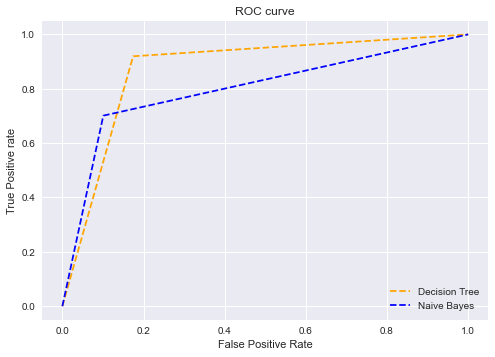

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred2, pos_label=1)

# auc score
auc_score1 = roc_auc_score(y_test, y_pred)
auc_score2 = roc_auc_score(y_test, y_pred2)
print("\nAUC Score for Decision Tree : ",auc_score1)
print("\nAUC Score for Naive Bayes : ",auc_score2)


# plot roc curves
plt.style.use('seaborn')
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='blue', label='Naive Bayes')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.savefig('ROC',dpi=300)
plt.show();